In [1]:
# imporation basique
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# charger le dataset
df = pd.read_csv('../raw_data/data_clean.csv')
df.head()
df['release_date'] = df['release_date'].astype('datetime64')

In [9]:
df

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,...,world_war_i,world_war_ii,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,revenue,has_a_website
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,0,0,0,0,550,15000000.0,10000000,20000000,107850000.0,0
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,5,122,0,0,0,7500000.0,5000000,10000000,29925000.0,1
2,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,...,0,0,0,0,0,7500000.0,5000000,10000000,29925000.0,0
3,70,Half-Life,1998-11-08,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Online Multi-Player...,Action,FPS;Classic;Action,...,0,0,0,0,0,7500000.0,5000000,10000000,53925000.0,1
4,80,Counter-Strike: Condition Zero,2004-03-01,1,Valve,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,Action;FPS;Multiplayer,...,0,0,0,0,0,15000000.0,10000000,20000000,107850000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26862,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,...,0,0,0,0,0,10000.0,0,20000,20900.0,0
26863,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,...,0,0,0,0,0,10000.0,0,20000,16900.0,0
26864,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,...,0,0,0,0,0,10000.0,0,20000,39900.0,1
26865,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,...,0,0,0,0,0,10000.0,0,20000,51900.0,1


In [10]:
# compter les colonnes par type
df.dtypes.value_counts()

int64             377
object             15
float64             3
datetime64[ns]      1
dtype: int64

In [11]:
# new_df = df.select_dtypes(include='object')

In [12]:
df.head(2)

,steam_appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,...,world_war_i,world_war_ii,wrestling,zombies,e_sports,owner_median,owner_lower,owner_upper,revenue,has_a_website
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,...,0,0,0,0,550,15000000.0,10000000,20000000,107850000.0,0
1,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,...,5,122,0,0,0,7500000.0,5000000,10000000,29925000.0,1


In [13]:
# nom des colonnes
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(f'"{key}"')

"steam_appid"
"name"
"release_date"
"english"
"developer"
"publisher"
"platforms"
"categories"
"genres"
"steamspy_tags"
"achievements"
"owners"
"price"
"detailed_description"
"about_the_game"
"short_description"
"header_image"
"screenshots"
"background"
"website"
"1980s"
"1990s"
"2.5d"
"2d"
"2d_fighter"
"360_video"
"3d"
"3d_platformer"
"3d_vision"
"4_player_local"
"4x"
"6dof"
"atv"
"abstract"
"action"
"action_rpg"
"action_adventure"
"addictive"
"adventure"
"agriculture"
"aliens"
"alternate_history"
"america"
"animation_&_modeling"
"anime"
"arcade"
"arena_shooter"
"artificial_intelligence"
"assassin"
"asynchronous_multiplayer"
"atmospheric"
"audio_production"
"bmx"
"base_building"
"baseball"
"based_on_a_novel"
"basketball"
"batman"
"battle_royale"
"beat_em_up"
"beautiful"
"benchmark"
"bikes"
"blood"
"board_game"
"bowling"
"building"
"bullet_hell"
"bullet_time"
"crpg"
"capitalism"
"card_game"
"cartoon"
"cartoony"
"casual"
"cats"
"character_action_game"
"character_customization"
"chess"
"

In [16]:
# création du nouveau DataFrame
from sklearn.preprocessing import OneHotEncoder 

ohe = OneHotEncoder(sparse = False)
ohe.fit(df[['platforms']])
platform_encoded = ohe.transform(df[['platforms']])

df_temp = pd.DataFrame(platform_encoded)

new_df = df[["release_date",\
             "english",\
             "price",\
            "has_a_website"
            ]]

    # Ajouter les plateformes
new_df = new_df.join(df_temp)

<AxesSubplot:>

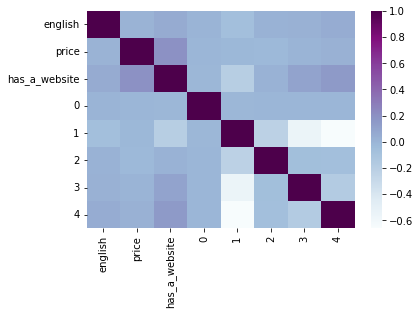

In [17]:
# Heatmap
corr = new_df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "BuPu")